In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, SimpleRNN 

In [26]:
data = pd.read_csv('GOOGL.csv')
data.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1261,2009-08-21,233.003006,233.278275,231.556564,232.852859,232.852859,7113879
1269,2009-09-02,228.138138,229.394394,226.521515,226.731735,226.731735,3605990
858,2008-01-16,314.799805,320.315308,301.266266,308.283295,308.283295,21098880
2995,2016-07-13,735.520020,735.520020,729.020020,729.479980,729.479980,1021800
1614,2011-01-14,309.009003,312.447449,308.848846,312.402405,312.402405,4726469
3498,2018-07-12,1174.859985,1201.989990,1173.099976,1201.260010,1201.260010,2207400
671,2007-04-20,245.505508,246.496490,241.251251,241.481476,241.481476,24298677
3854,2019-12-10,1339.939941,1348.000000,1334.000000,1342.890015,1342.890015,880300
3440,2018-04-19,1069.020020,1097.510010,1069.020020,1089.449951,1089.449951,1994200
564,2006-11-13,237.687683,240.825821,237.307312,240.755753,240.755753,8675116


In [27]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

df = data[['Close']]

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

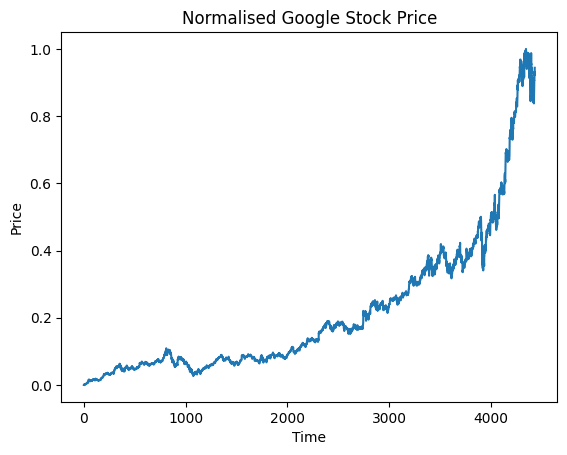

In [29]:
plt.plot(scaled_data)
plt.title('Normalised Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [30]:
def create_sequence(data, time_step):
    x_arr, y_arr = [], []
    for i in range (time_step, len(data)):
        x_arr.append(data[i - time_step : i, 0])
        y_arr.append(data[i, 0])
    return np.array(x_arr), np.array(y_arr)

In [31]:
time_step= 60

x, y = create_sequence(scaled_data, time_step)

x = x.reshape(x.shape[0], x.shape[1], 1)

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [33]:
model = Sequential()

model.add(SimpleRNN(units=40, return_sequences=False, input_shape=(x_train.shape[1], 1)))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test) )

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 7.4043e-04 - val_loss: 0.0074
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2077e-05 - val_loss: 0.0068
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.0520e-05 - val_loss: 0.0064
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.7480e-05 - val_loss: 0.0057
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5745e-05 - val_loss: 0.0049
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2748e-05 - val_loss: 0.0042
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.4405e-05 - val_loss: 0.0037
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9553e-05 - val_loss: 0.0027
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4889e-05 - val_loss: 0.0033
Epoch 10/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0530e-05 - val_loss: 0.0028
Epoch 11/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0031e-05 - val_loss: 0.0028
Epoch 12

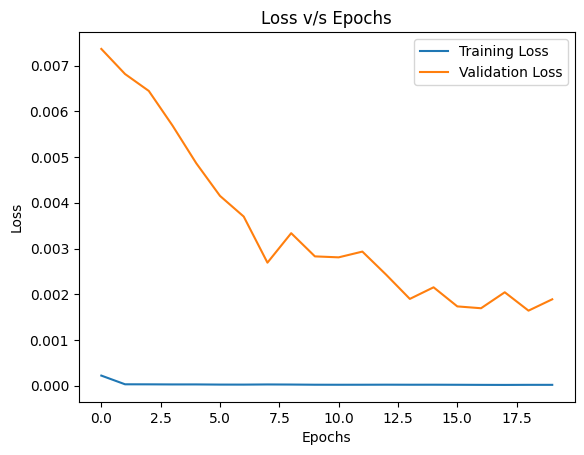

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
predicted_prices = model.predict(x_test)


predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


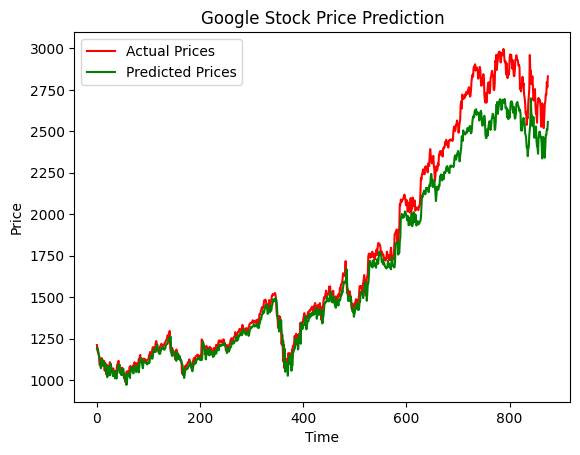

In [46]:
plt.plot(y_test_actual, color='red', label='Actual Prices')
plt.plot(predicted_prices, color='green', label='Predicted Prices')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()